# Investigating Discrimination in Schools

Data obtained at Civil Rights Data Collection
<br>https://ocrdata.ed.gov/

Utilizing two types of datasets:
1. Individuals districts
2. Individual schools

There seems to be some difference in numbers between the two datasets, so I will explore both. I will be utilizing the school based data more at the end when I start adding more data like teacher count.

Also, please note that this data is from 2015.

## TODO

1. Create three business questions
2. Create columns with normalized / percentage based data
3. Add more data to school based DataFrame
    - Teacher Count

## Investigate District Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

In [2]:
df = pd.read_csv('GeorgiaBullying2015.csv')
df.head()

,Lea State,LEA,ID,Year,Category,Allegations,American Indian or Alaska Native,Asian,Hawaiian/ Pacific Islander,Hispanic,Black,White,Two or more races,Total,SWD (IDEA-Eligible),SWD (Section 504 only),LEP
0,GA,Chattahoochee County,1301050,2015,Allegations - basis of race color or national ...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GA,Chattahoochee County,1301050,2015,Allegations - basis of religion,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GA,Chattahoochee County,1301050,2015,Disciplined for harassment or bullying on basi...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GA,Chattahoochee County,1301050,2015,Students reported to have been harassed or bul...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GA,Chattahoochee County,1301050,2015,Total enrollment,NaN,4.0,9.0,4.0,105.0,267.0,462.0,39.0,890.0,135.0,4.0,10.0


In [3]:
# Race / Ethnicity / Nationality
ren = ['American Indian or Alaska Native','Asian', 'Hawaiian/ Pacific Islander', 'Hispanic', 'Black', 'White', 'Two or more races', 'Total']


List of Counties with No Reported Allegations
['Appling County', 'Atkinson County', 'Bacon County', 'Baker County', 'Baldwin County', 'Banks County', 'Berrien County', 'Bibb County', 'Bleckley County', 'Brantley County', 'Bremen City Schools', 'Bryan County', 'Buford City', 'Bulloch County', 'Burke County', 'Calhoun City', 'Calhoun County', 'Candler County', 'Carrollton City', 'Cartersville City', 'Chattahoochee County', 'Chattooga County', 'Chickamauga City', 'Clarke County', 'Clay County', 'Clinch County', 'Coffee County', 'Colquitt County', 'Columbia County', 'Commission Charter Schools- Atlanta Heights Charter School', 'Commission Charter Schools- CCAT School', 'Commission Charter Schools- Coweta Charter Academy', 'Commission Charter Schools- Fulton Leadership Academy', 'Commission Charter Schools- Ivy Preparatory Academy School', 'Commission Charter Schools- Pataula Charter Academy', 'Cook County', 'Coweta County', 'Crawford County', 'Crisp County', 'Dade County', 'Dalton City', '

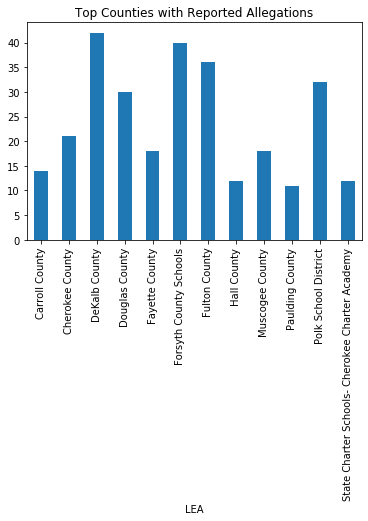

In [4]:
# Group by counties and sum the allegations for each one
df_allegation_sum = df.groupby('LEA')['Allegations'].sum()
df_allegation_sum[df_allegation_sum > 10].plot(kind="bar");
plt.title("Top Counties with Reported Allegations");

print("List of Counties with No Reported Allegations")
print(df_allegation_sum[df_allegation_sum == 0].index.tolist())


In [5]:
allegation_top_counties = df_allegation_sum[df_allegation_sum > 10].sort_values(ascending=False)
for x,y in allegation_top_counties.iteritems():
    print(x,y)

DeKalb County 42.0
Forsyth County Schools 40.0
Fulton County 36.0
Polk School District 32.0
Douglas County 30.0
Cherokee County 21.0
Muscogee County 18.0
Fayette County 18.0
Carroll County 14.0
State Charter Schools- Cherokee Charter Academy 12.0
Hall County 12.0
Paulding County 11.0


**Now that we have the schools with the highest amount of race based allegations, let's visualize other features in the dataset and possibly find relationships**

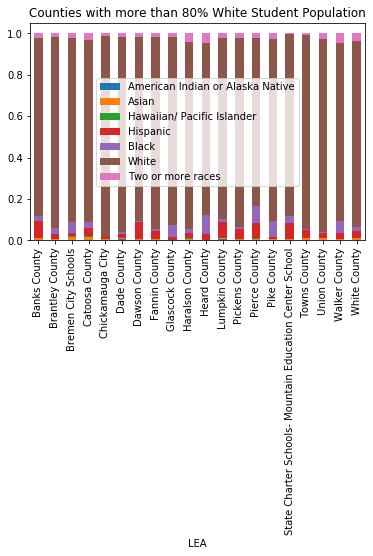

In [6]:
category = "Total enrollment"
ren_df = df[df["Category"]==category]
normalize_df = ren_df[ren].div(ren_df['Total'], axis=0)
normalize_df["LEA"] = ren_df["LEA"]
ren_breakdown = normalize_df.groupby('LEA')[ren].sum().drop("Total",axis=1)
ren_breakdown[ren_breakdown.White > 0.8].plot(kind="bar", stacked=True);
plt.title("Counties with more than 80% White Student Population");

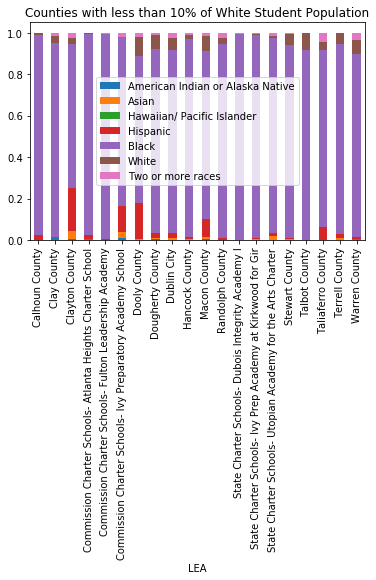

In [7]:
ren_breakdown[ren_breakdown.White < 0.1].plot(kind="bar", stacked=True);
plt.title("Counties with less than 10% of White Student Population");

In [8]:
def common(a,b): 
    c = [value for value in a if value in b] 
    return c

In [9]:
sl = allegation_top_counties.index.tolist()
hrl = ren_breakdown[ren_breakdown.White > 0.5].index.tolist()
lrl = ren_breakdown[ren_breakdown.White < 0.5].index.tolist()

print("Number of Counties with more than 10 Rase Based Allegations: {}".format(len(sl)))
print()
print("Number of Counties with higher than 50% White Student Population: {}".format(len(hrl)))
print("List of shared counties between Counties with Highest Allegations and Counties with higher than 50% White Student Population: {}".format(common(sl,hrl)))
print()
print("Number of Counties with less than 50% White Student Population: {}".format(len(lrl)))
print("List of shared counties between Counties with Highest Allegations and Counties with lower than 50% White Student Population: {}".format(common(sl,lrl)))


Number of Counties with more than 10 Rase Based Allegations: 12

Number of Counties with higher than 50% White Student Population: 110
List of shared counties between Counties with Highest Allegations and Counties with higher than 50% White Student Population: ['Forsyth County Schools', 'Polk School District', 'Cherokee County', 'Fayette County', 'Carroll County', 'State Charter Schools- Cherokee Charter Academy', 'Hall County', 'Paulding County']

Number of Counties with less than 50% White Student Population: 92
List of shared counties between Counties with Highest Allegations and Counties with lower than 50% White Student Population: ['DeKalb County', 'Fulton County', 'Douglas County', 'Muscogee County']


**There seems to be a near even divide between counties with higher than 50% white student population (110) and lower (92). 8 out of the 12 schools with high allegations fall under the counties with higher than 50% white student population. Below, let's do a similar comparison, but instead of using 50% as our divide, let's make it more reflective of Georgia's race ratio.**

Georgia Population (2015)
- Total: 10,181,111
- White Population: 6,269,796

Data gathered from:
<br>https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?src=bkmk

In [10]:
sl = allegation_top_counties.index.tolist()
hrl = ren_breakdown[ren_breakdown.White > 0.6].index.tolist()
lrl = ren_breakdown[ren_breakdown.White < 0.6].index.tolist()

print("Number of Counties with more than 10 Rase Based Allegations: {}".format(len(sl)))
print()
print("Number of Counties with higher than 60% White Student Population: {}".format(len(hrl)))
print("List of shared counties between Counties with Highest Allegations and Counties with higher than 60% White Student Population: {}".format(common(sl,hrl)))
print()
print("Number of Counties with less than 60% White Student Population: {}".format(len(lrl)))
print("List of shared counties between Counties with Highest Allegations and Counties with lower than 60% White Student Population: {}".format(common(sl,lrl)))


Number of Counties with more than 10 Rase Based Allegations: 12

Number of Counties with higher than 60% White Student Population: 76
List of shared counties between Counties with Highest Allegations and Counties with higher than 60% White Student Population: ['Forsyth County Schools', 'Cherokee County', 'Carroll County', 'State Charter Schools- Cherokee Charter Academy', 'Paulding County']

Number of Counties with less than 60% White Student Population: 127
List of shared counties between Counties with Highest Allegations and Counties with lower than 60% White Student Population: ['DeKalb County', 'Fulton County', 'Polk School District', 'Douglas County', 'Muscogee County', 'Fayette County', 'Hall County']


**Above, there's a larger divide between the number counties with higher and lower white student population. Also, the counties with more allegations are near evenly split between the categories (5 vs 7)**

**Please note that individual counties do not reflect the same race ratio compared to the overall state race ratio.**

**Below, you'll see some quick calculations of averages for the state of Georgia**

In [11]:
category = "Allegations - basis of race color or national origin"
print("Average Allegations on the basis of race color or national origin")
print(df[df["Category"]==category].Allegations.mean())
print()

category = "Disciplined for harassment or bullying on basis of race color or national origin"
print("Average of Disciplined Students for harassment or bullying on basis of race color or national origin")
print(df[df["Category"]==category][ren].mean())
print()

category = "Students reported to have been harassed or bullied on basis of race color or national origin"
print("Average of Students reported to have been harassed or bullied on basis of race color or national origin")
print(df[df["Category"]==category][ren].mean())

Average Allegations on the basis of race color or national origin
1.8719211822660098

Average of Disciplined Students for harassment or bullying on basis of race color or national origin
American Indian or Alaska Native    0.000000
Asian                               0.068966
Hawaiian/ Pacific Islander          0.009852
Hispanic                            0.364532
Black                               0.866995
White                               1.044335
Two or more races                   0.113300
Total                               2.467980
dtype: float64

Average of Students reported to have been harassed or bullied on basis of race color or national origin
American Indian or Alaska Native    0.009852
Asian                               0.167488
Hawaiian/ Pacific Islander          0.000000
Hispanic                            0.364532
Black                               1.300493
White                               0.527094
Two or more races                   0.083744
Total             

## Investigate School Data

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from pathlib import Path
%matplotlib inline

data_columns = ['Lea State', 'LEA', 'School State', 'School', 'ID', 'Year', 'Category',
       'Allegations', 'American Indian or Alaska Native', 'Asian',
       'Hawaiian/ Pacific Islander', 'Hispanic', 'Black', 'White',
       'Two or more races', 'Total', 'SWD (IDEA-Eligible)',
       'SWD (Section 504 only)', 'LEP']

bully_df = pd.DataFrame(columns=data_columns)

data_path = Path("georgia/")
p = data_path.glob('**/*')
files = [x for x in p if x.is_file()]
for file in files:
    try:
        bully_df = pd.concat([bully_df, pd.read_csv(file)],sort=False)
    except:
        pass
    
bully_df.head()

,Lea State,LEA,School State,School,ID,Year,Category,Allegations,American Indian or Alaska Native,Asian,...,Hispanic,Black,White,Two or more races,Total,SWD (IDEA-Eligible),SWD (Section 504 only),LEP,With State Certification,Total Students
0,GA,Cobb County,GA,Kennesaw Charter School,130129002842,2015,Allegations - basis of race color or national ...,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GA,Cobb County,GA,Kennesaw Charter School,130129002842,2015,Allegations - basis of religion,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GA,Cobb County,GA,Kennesaw Charter School,130129002842,2015,Disciplined for harassment or bullying on basi...,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,NaN
3,GA,Cobb County,GA,Kennesaw Charter School,130129002842,2015,Students reported to have been harassed or bul...,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,NaN
4,GA,Cobb County,GA,Kennesaw Charter School,130129002842,2015,Total enrollment,NaN,2.0,55.0,...,88.0,424.0,244.0,46.0,859.0,50,16.0,46.0,NaN,NaN


List of Counties with No Reported Allegations
['Appling County', 'Atlanta Public Schools', 'Baldwin County', 'Barrow County', 'Bibb County', 'Bleckley County', 'Brantley County', 'Bremen City Schools', 'Bryan County', 'Bulloch County', 'Burke County', 'Camden County', 'Candler County', 'Carrollton City', 'Cartersville City', 'Catoosa County', 'Charlton County', 'Chattooga County', 'Clarke County', 'Coffee County', 'Columbia County', 'Commerce City', 'Commission Charter Schools- Atlanta Heights Charter School', 'Commission Charter Schools- CCAT School', 'Commission Charter Schools- Coweta Charter Academy', 'Commission Charter Schools- Ivy Preparatory Academy School', 'Coweta County', 'Crisp County', 'Dade County', 'Dalton City', 'Dawson County', 'Decatur City', 'Department of Juvenile Justice', 'Dodge County', 'Dooly County', 'Dublin City', 'Echols County', 'Effingham County', 'Elbert County Schools', 'Emanuel County', 'Evans County', 'Fannin County', 'Floyd County', 'Franklin County', 

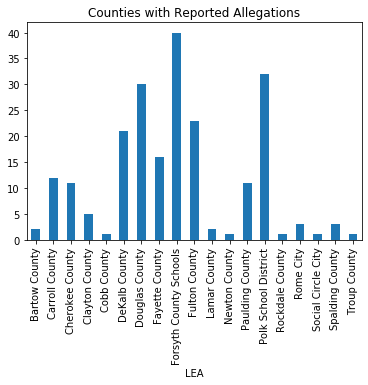

In [13]:
bully_sum = bully_df.groupby('LEA')['Allegations'].sum()
bully_sum[bully_sum > 0].plot(kind="bar");
plt.title("Counties with Reported Allegations");

print("List of Counties with No Reported Allegations")
print(bully_sum[bully_sum == 0].index.tolist())


In [14]:
# Race / Ethnicity / Nationality
ren = ['American Indian or Alaska Native','Asian', 'Hawaiian/ Pacific Islander', 'Hispanic', 'Black', 'White', 'Two or more races', 'Total']

In [15]:
# Averages for students who were disciplined for harassment or bullying on basis of race color or national origin

category = "Disciplined for harassment or bullying on basis of race color or national origin"
bully_df[bully_df["Category"]==category][ren].mean()

American Indian or Alaska Native    0.000000
Asian                               0.013774
Hawaiian/ Pacific Islander          0.000000
Hispanic                            0.046832
Black                               0.117080
White                               0.148760
Two or more races                   0.016529
Total                               0.342975
dtype: float64

In [16]:
# Averages for students who reported to have been harassed or bullied on basis of race color or national origin

category = "Students reported to have been harassed or bullied on basis of race color or national origin"
bully_df[bully_df["Category"]==category][ren].mean()

American Indian or Alaska Native    0.002755
Asian                               0.022039
Hawaiian/ Pacific Islander          0.000000
Hispanic                            0.041322
Black                               0.159780
White                               0.078512
Two or more races                   0.012397
Total                               0.316804
dtype: float64

In [17]:
# Average of 0.2 allegations on the basis of race color or national origin

category = "Allegations - basis of race color or national origin"
bully_df[bully_df["Category"]==category].Allegations.mean()

0.2796143250688705

In [18]:
# List of counties
bully_df.LEA.unique()

array(['Cobb County', 'Henry County', 'Paulding County',
       'Polk School District', 'Bartow County', 'Newton County',
       'Walton County', 'Bremen City Schools', 'Forsyth County Schools',
       'Gwinnett County', 'Cherokee County', 'Fulton County',
       'Bulloch County', 'Echols County', 'Pickens County',
       'DeKalb County', 'Commission Charter Schools- CCAT School',
       'Social Circle City', 'Haralson County',
       'State Charter Schools- Utopian Academy for the Arts Charter',
       'Clayton County',
       'State Charter Schools- Dubois Integrity Academy I',
       'Douglas County', 'Carroll County', 'Fayette County',
       'Carrollton City', 'Rockdale County', 'Heard County',
       'Meriwether County',
       'State Schools- Atlanta Area School for the Deaf',
       'Department of Juvenile Justice', 'Barrow County', 'Troup County',
       'Floyd County', 'Rome City', 'Spalding County', 'Coweta County',
       'Commission Charter Schools- Coweta Charter Academy'

### Dive deeper in Carroll County

Utilizing the school data

In [19]:
carroll_df = bully_df[bully_df["LEA"] == "Carroll County"]

category = "Allegations - basis of race color or national origin"
carroll_school_allegations = carroll_df[carroll_df["Category"]==category].Allegations.sum()
print("Number of allegations on the basis of race color or national origin in Carroll County: {}".format(carroll_school_allegations))
print()

# Averages in Carroll County for students who reported to have been harassed or bullied on basis of race color or national origin
category = "Students reported to have been harassed or bullied on basis of race color or national origin"
carroll_city_reports = carroll_df[carroll_df["Category"]==category][ren].mean()

print("Breakdown of students reported to have been harassed or bullied on basis of race color or national origin for Carroll County")
print(carroll_city_reports)
print()

# Averages for students who were disciplined for harassment or bullying on basis of race color or national origin
category = "Disciplined for harassment or bullying on basis of race color or national origin"
carroll_school_discipline = carroll_df[carroll_df["Category"]==category][ren].mean()

print("Breakdown of students disciplined for harassment or bullying on basis of race color or national origin for Carroll County")
print(carroll_school_discipline)
print()

Number of allegations on the basis of race color or national origin in Carroll County: 12.0

Breakdown of students reported to have been harassed or bullied on basis of race color or national origin for Carroll County
American Indian or Alaska Native    0.000000
Asian                               0.000000
Hawaiian/ Pacific Islander          0.000000
Hispanic                            0.000000
Black                               0.476190
White                               0.619048
Two or more races                   0.095238
Total                               1.190476
dtype: float64

Breakdown of students disciplined for harassment or bullying on basis of race color or national origin for Carroll County
American Indian or Alaska Native    0.000000
Asian                               0.000000
Hawaiian/ Pacific Islander          0.000000
Hispanic                            0.000000
Black                               0.333333
White                               0.761905
Two or more ra

### Compare: Carroll County and Atlanta Public Schools

Utilizing the district data

In [20]:
carroll_district_df = df[df["LEA"] == "Carroll County"]
atlanta_district_df = df[df["LEA"] == "Atlanta Public Schools"]

In [21]:
category = "Allegations - basis of race color or national origin"
carroll_allegations = carroll_district_df[carroll_district_df["Category"] == category].Allegations.sum()
atlanta_allegations = atlanta_district_df[atlanta_district_df["Category"] == category].Allegations.sum()

print("Number of allegations on the basis of race color or national origin in Carroll County: {}".format(carroll_allegations))
print()
print("Number of allegations on the basis of race color or national origin in Atlanta Public Schools: {}".format(atlanta_allegations))
print()

category = "Students reported to have been harassed or bullied on basis of race color or national origin"
carroll_reports = carroll_district_df[carroll_district_df["Category"]==category][ren].mean()
atlanta_reports = atlanta_district_df[atlanta_district_df["Category"]==category][ren].mean()

#print("{}".format())
print("Breakdown of students reported to have been harassed or bullied on basis of race color or national origin for Carroll County")
print(carroll_reports)
print()
print("Breakdown of students reported to have been harassed or bullied on basis of race color or national origin for Atlanta Public Schools")
print(atlanta_reports)
print()


Number of allegations on the basis of race color or national origin in Carroll County: 14.0

Number of allegations on the basis of race color or national origin in Atlanta Public Schools: 2.0

Breakdown of students reported to have been harassed or bullied on basis of race color or national origin for Carroll County
American Indian or Alaska Native     0.0
Asian                                0.0
Hawaiian/ Pacific Islander           0.0
Hispanic                             0.0
Black                               12.0
White                               15.0
Two or more races                    2.0
Total                               29.0
dtype: float64

Breakdown of students reported to have been harassed or bullied on basis of race color or national origin for Atlanta Public Schools
American Indian or Alaska Native    0.0
Asian                               0.0
Hawaiian/ Pacific Islander          0.0
Hispanic                            2.0
Black                               0.0
White

In [22]:
# District data
bully_df.head(10)

,Lea State,LEA,School State,School,ID,Year,Category,Allegations,American Indian or Alaska Native,Asian,...,Hispanic,Black,White,Two or more races,Total,SWD (IDEA-Eligible),SWD (Section 504 only),LEP,With State Certification,Total Students
0,GA,Cobb County,GA,Kennesaw Charter School,130129002842,2015,Allegations - basis of race color or national ...,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GA,Cobb County,GA,Kennesaw Charter School,130129002842,2015,Allegations - basis of religion,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GA,Cobb County,GA,Kennesaw Charter School,130129002842,2015,Disciplined for harassment or bullying on basi...,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,NaN
3,GA,Cobb County,GA,Kennesaw Charter School,130129002842,2015,Students reported to have been harassed or bul...,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,NaN
4,GA,Cobb County,GA,Kennesaw Charter School,130129002842,2015,Total enrollment,NaN,2.0,55.0,...,88.0,424.0,244.0,46.0,859.0,50,16.0,46.0,NaN,NaN
5,GA,Cobb County,GA,Lost Mountain Middle School,130129002250,2015,Allegations - basis of race color or national ...,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,GA,Cobb County,GA,Lost Mountain Middle School,130129002250,2015,Allegations - basis of religion,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,GA,Cobb County,GA,Lost Mountain Middle School,130129002250,2015,Disciplined for harassment or bullying on basi...,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,NaN
8,GA,Cobb County,GA,Lost Mountain Middle School,130129002250,2015,Students reported to have been harassed or bul...,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,NaN
9,GA,Cobb County,GA,Lost Mountain Middle School,130129002250,2015,Total enrollment,NaN,4.0,28.0,...,67.0,172.0,766.0,28.0,1065.0,131,37.0,2.0,NaN,NaN


In [23]:
pd.DataFrame(bully_df.groupby(['LEA', 'School']).sum()['Allegations'])

Allegations
LEA              School                                         
Appling County   Altamaha Elementary School                  0.0
                 Appling County Elementary School            0.0
                 Appling County High School                  0.0
                 Appling County Middle School                0.0
                 Appling County Primary School               0.0
...                                                          ...
Wilkes County    Washington-Wilkes Primary School            0.0
Wilkinson County Wilkinson County Elementary School          0.0
                 Wilkinson County High School                0.0
                 Wilkinson County Middle School              0.0
                 Wilkinson County Primary School             0.0

[1878 rows x 1 columns]

## Combine allegations df with teacher count df

In [27]:
data_columns = ['Lea State', 'LEA', 'School State', 'School', 'ID', 'Year', 'Category',
       'Total', 'With State Certification', 'American Indian or Alaska Native',
       'Asian', 'Hawaiian/ Pacific Islander', 'Hispanic', 'Black', 'White',
       'Two or more races', 'Total Students', 'SWD (IDEA-Eligible)', 'LEP']

teacher_school_df = pd.DataFrame(columns=data_columns)

data_path = Path("georgia/teacher/")
p = data_path.glob('**/*')
files = [x for x in p if x.is_file()]
for file in files:
    try:
        teacher_school_df = pd.concat([teacher_school_df, pd.read_csv(file)],sort=False)
    except:
        pass

teacher_school_df

,Lea State,LEA,School State,School,ID,Year,Category,Total,With State Certification,American Indian or Alaska Native,Asian,Hawaiian/ Pacific Islander,Hispanic,Black,White,Two or more races,Total Students,SWD (IDEA-Eligible),LEP
0,GA,Effingham County,GA,Springfield Elementary School,130198000891,2015,Classroom Teachers,46.71,46.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GA,Effingham County,GA,Springfield Elementary School,130198000891,2015,Classroom teachers in their first year of teac...,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GA,Effingham County,GA,Springfield Elementary School,130198000891,2015,Classroom teachers in their second year of tea...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GA,Effingham County,GA,Springfield Elementary School,130198000891,2015,Teachers absent more than 10 days of the schoo...,17.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GA,Effingham County,GA,Springfield Elementary School,130198000891,2015,Teachers employed during current school year,49.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,GA,Walker County,GA,Chattanooga Valley Elementary School,130537001760,2015,Teachers absent more than 10 days of the schoo...,9.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,GA,Walker County,GA,Chattanooga Valley Elementary School,130537001760,2015,Teachers employed during current school year,37.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,GA,Walker County,GA,Chattanooga Valley Elementary School,130537001760,2015,Teachers employed during both the current and ...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,GA,Walker County,GA,Chattanooga Valley Elementary School,130537001760,2015,High-School Counselors,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
temp_df = teacher_school_df[teacher_school_df["School"]=="Eastside Elementary School"]
temp_df[temp_df["Category"]=="Classroom Teachers"]

,Lea State,LEA,School State,School,ID,Year,Category,Total,With State Certification,American Indian or Alaska Native,Asian,Hawaiian/ Pacific Islander,Hispanic,Black,White,Two or more races,Total Students,SWD (IDEA-Eligible),LEP
16,GA,Polk School District,GA,Eastside Elementary School,130420001500,2015,Classroom Teachers,46.10,46.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,GA,Douglas County,GA,Eastside Elementary School,130186002160,2015,Classroom Teachers,30.50,29.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,GA,Whitfield County,GA,Eastside Elementary School,130570001832,2015,Classroom Teachers,41.85,41.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,GA,Coweta County,GA,Eastside Elementary School,130150000747,2015,Classroom Teachers,35.00,34.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,GA,Douglas County,GA,Eastside Elementary School,130186002160,2015,Classroom Teachers,30.50,29.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,GA,Coffee County,GA,Eastside Elementary School,130135001883,2015,Classroom Teachers,42.64,42.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,GA,Whitfield County,GA,Eastside Elementary School,130570001832,2015,Classroom Teachers,41.85,41.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
combined_school_df = pd.concat([teacher_school_df[teacher_school_df["Category"]!="Total enrollment"],bully_df], sort=True)
combined_school_df = combined_school_df.drop(["Year","ID","School State","Lea State"],axis=1)

# There are a different amount of school csv's downloaded between the two folders
# Finding schools in common and reducing dataframe to those

# schools_in_common = common(bully_df.School.unique(),teacher_school_df.School.unique())
# combined_school_df = combined_school_df[combined_school_df["School"].isin(schools_in_common)]

# Above, I only considered unique school names, 
# but there are different schools in different districts with the same names.
# Below, I combined District and School name and looked for unique values
lea_schools_in_common = common(.tolist() , (teacher_school_df['LEA'] + " "+ teacher_school_df['School']).tolist())
combined_school_df = combined_school_df[(combined_school_df["LEA"]+" "+combined_school_df["School"]).isin(lea_schools_in_common)]
combined_school_df.head(5)




,Allegations,American Indian or Alaska Native,Asian,Black,Category,Hawaiian/ Pacific Islander,Hispanic,LEA,LEP,SWD (IDEA-Eligible),SWD (Section 504 only),School,Total,Total Students,Two or more races,White,With State Certification
0,NaN,NaN,NaN,NaN,Classroom Teachers,NaN,NaN,Effingham County,NaN,NaN,NaN,Springfield Elementary School,46.71,NaN,NaN,NaN,46.71
1,NaN,NaN,NaN,NaN,Classroom teachers in their first year of teac...,NaN,NaN,Effingham County,NaN,NaN,NaN,Springfield Elementary School,1.00,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Classroom teachers in their second year of tea...,NaN,NaN,Effingham County,NaN,NaN,NaN,Springfield Elementary School,0.00,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,Teachers absent more than 10 days of the schoo...,NaN,NaN,Effingham County,NaN,NaN,NaN,Springfield Elementary School,17.00,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Teachers employed during current school year,NaN,NaN,Effingham County,NaN,NaN,NaN,Springfield Elementary School,49.00,NaN,NaN,NaN,NaN


In [113]:
# combined_school_sum = combined_school_df[combined_school_df["Category"]=="Classroom Teachers"].groupby('LEA')['Total'].sum()
# combined_school_sum[combined_school_sum > 5000].plot(kind="bar",);
# plt.title("Counties with Reported Allegations");

ren_df = combined_school_df[combined_school_df["Category"].isin(["Total enrollment","Classroom Teachers"])].sort_values(by=['LEA', 'School']).drop_duplicates()
#ren_df.dropna(subset=['Total Students'], inplace=True)
#ren_df.dropna(subset=['Total'], inplace=True)
normalize_df = ren_df['Total'].div(ren_df['Total Students'], axis=0)
normalize_df["LEA"] = ren_df["LEA"]

# Problem: Two 'Total enrollment' rows for some schools
# Drop 'Total enrollment' with "Total Students" as NaN
#ren_df[ren_df["Category"]=="Total enrollment"].dropna(subset=['Total Students'],inplace=True)
#ren_df.loc[ren_df["Category"]=="Total enrollment",'Total Students'].dropna(how='any',inplace=True)
#ren_df[]
#ren_df[ren_df["School"]=="Eastside Elementary School"]


#ren_breakdown = normalize_df.groupby('LEA')['Total'].sum()
#ren_breakdown
# ren_breakdown[ren_breakdown.White > 0.8].plot(kind="bar", stacked=True);
# plt.title("Counties with more than 80% White Student Population");

,Allegations,American Indian or Alaska Native,Asian,Black,Category,Hawaiian/ Pacific Islander,Hispanic,LEA,LEP,SWD (IDEA-Eligible),SWD (Section 504 only),School,Total,Total Students,Two or more races,White,With State Certification
104,NaN,NaN,NaN,NaN,Classroom Teachers,NaN,NaN,Coffee County,NaN,NaN,NaN,Eastside Elementary School,42.64,NaN,NaN,NaN,42.64
111,NaN,2.0,7.0,352.0,Total enrollment,0.0,67.0,Coffee County,34.0,62,NaN,Eastside Elementary School,NaN,670.0,25.0,217.0,NaN
8,NaN,NaN,NaN,NaN,Classroom Teachers,NaN,NaN,Coweta County,NaN,NaN,NaN,Eastside Elementary School,35.00,NaN,NaN,NaN,34.00
9,NaN,4.0,2.0,46.0,Total enrollment,0.0,13.0,Coweta County,2.0,56,7.0,Eastside Elementary School,484.00,NaN,19.0,400.0,NaN
15,NaN,4.0,2.0,46.0,Total enrollment,0.0,13.0,Coweta County,2.0,56,NaN,Eastside Elementary School,NaN,484.0,19.0,400.0,NaN
56,NaN,NaN,NaN,NaN,Classroom Teachers,NaN,NaN,Douglas County,NaN,NaN,NaN,Eastside Elementary School,30.50,NaN,NaN,NaN,29.50
44,NaN,2.0,2.0,307.0,Total enrollment,0.0,100.0,Douglas County,76.0,50,2.0,Eastside Elementary School,491.00,NaN,28.0,52.0,NaN
63,NaN,2.0,2.0,307.0,Total enrollment,0.0,100.0,Douglas County,76.0,50,NaN,Eastside Elementary School,NaN,491.0,28.0,52.0,NaN
16,NaN,NaN,NaN,NaN,Classroom Teachers,NaN,NaN,Polk School District,NaN,NaN,NaN,Eastside Elementary School,46.10,NaN,NaN,NaN,46.10
14,NaN,0.0,2.0,100.0,Total enrollment,0.0,22.0,Polk School District,2.0,116,7.0,Eastside Elementary School,747.00,NaN,46.0,577.0,NaN


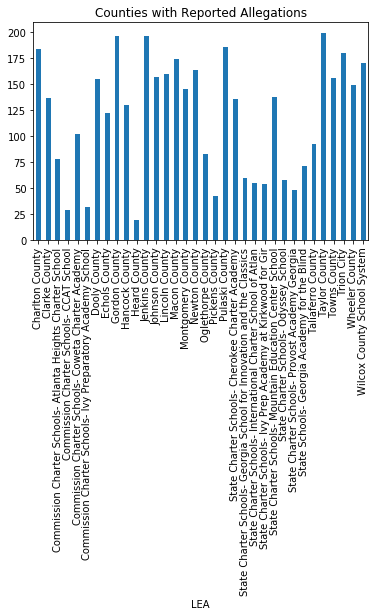

In [44]:
combined_school_sum[combined_school_sum < 200].plot(kind="bar",);
plt.title("Counties with Reported Allegations");

## Create a Machine Learning acceptable Dataset

In [ ]:
ren = ['American Indian or Alaska Native','Asian', 'Hawaiian/ Pacific Islander', 'Hispanic', 'Black', 'White', 'Two or more races', 'Total']
category1 = "Allegations - basis of race color or national origin"
category2 = "Total enrollment"
category3 = "Disciplined for harassment or bullying on basis of race color or national origin"
category4 = "Students reported to have been harassed or bullied on basis of race color or national origin"
combine = [category2, category3, category4]
temp3 = pd.DataFrame()
for school in bully_df.School.unique():
    temp_df = bully_df[bully_df["School"]==school]
    temp_df = temp_df[temp_df["Category"]==category1]
    
    temp_df2 = pd.DataFrame()
    temp_df2["LEA"] = temp_df["LEA"]
    temp_df2[category1] = temp_df["Allegations"]
    for comb in combine:
        for r in ren:
            temp_name = r + " | " + comb
            temp_df = bully_df[bully_df["School"]==school]
            temp_df = temp_df[temp_df["Category"]==comb]
            if temp_df[r].tolist():
                temp_df2[temp_name] = temp_df[r].iloc[0]
            else:
                temp_df2[temp_name] = 0

    temp3 = pd.concat([temp3,temp_df2])

temp3

